$\frac{\partial B_r '}{\partial t'}=-\frac{\partial (\alpha ' B_{\phi}')}{\partial z'}+\frac{\partial^2 B_r'}{\partial z ^{'2}}$


$\frac{\partial B_{\phi}'}{\partial t'}=\frac{D}{\alpha_0 '} B_{r} '+\frac{\partial^2 B_{\phi} '}{\partial z^{'2} }$

In [39]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  
from tqdm import tqdm


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    
    sol = np.zeros(Nz)  # Initialize solution array
    for i in range(3, Nz - 4):

        sol[i] = ((2 * f[i - 3]) - (27 * f[i - 2]) + (270 * f[i - 1]) - (490 * f[i]) + (270 * f[i + 1]) - (27 * f[i + 2]) + (2 * f[i + 3])) / (180 * (dz ** 2))

    

    return sol

def df(f,dz,Nz):
    # np.copy(f)
    sol = np.zeros(Nz)
    for i in range(3,Nz-4):
        #sol[i] = ((-2 * f[i - 5]) + (25 * f[i - 4]) - (150 * f[i - 3]) + (600 * f[i - 2]) - (2100 * f[i - 1]) + (2100 * f[i + 1]) - (600 * f[i + 2]) + (150 * f[i + 3]) - (25 * f[i + 4]) + (2 * f[i + 5])) / (2520 * dz)
        sol[i] = ((- f[i - 3]) + (9 * f[i - 2]) - (45 * f[i - 1]) + (45 * f[i + 1]) - (9 * f[i + 2]) + (f[i + 3])) / (60 * dz)
    #sol=sol[3:-3]   
    return sol

def solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D):
    #intials()
    Br=[]
    Bphi=[]
    decay=[]

    if 0 in time_plot:
        Br.append(Br_t0)
        Bphi.append(Bphi_t0)

    
    for j in tqdm(range(0, Nt + 1)):
        
        k1r = dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,dt*j)
        k1phi = dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,dt*j)
        
        k2r = (dBrdt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz,vzfn,dt*j))
        k2phi = (dBphidt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz,vzfn,dt*j)) 
        
        k3r = (dBrdt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz,vzfn,dt*j)) 
        k3phi = (dBphidt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz,vzfn,dt*j)) 
        
        k4r = (dBrdt(Br_t0+k3r*dt,Bphi_t0+k3phi*dt/2,z,D,alpha,dz,Nz,vzfn,dt*j)) 
        k4phi = (dBphidt(Br_t0+k3r*dt/2,Bphi_t0+k3phi*dt,z,D,alpha,dz,Nz,vzfn,dt*j))
        Br_t0 = Br_t0 + ((dt / 6.0) * (k1r +( 2 * k2r) + (2 * k3r) + k4r))
        
        Bphi_t0 = Bphi_t0 + ((dt / 6.0) * (k1phi + (2 * k2phi) + (2 * k3phi) + k4phi))
               
        #(Anti Symmetric Ghost Zone)
        Bphi_t0[3]=Bphi_z0
        Br_t0[3]=Br_z0

        Bphi_t0[Nz-4]=Bphi_zf
        Br_t0[Nz-4]=Br_zf

        Br_t0[Nz-1]=Br_zf-Br_t0[Nz-7]
        Bphi_t0[Nz-1]=Bphi_zf-Bphi_t0[Nz-7]

        Br_t0[Nz-2]=Br_zf-Br_t0[Nz-6]
        Bphi_t0[Nz-2]=Bphi_zf-Bphi_t0[Nz-6]

        Br_t0[Nz-3]=Br_zf-Br_t0[Nz-5]
        Bphi_t0[Nz-3]=Bphi_zf-Bphi_t0[Nz-5]

        Br_t0[0]=Br_z0-Br_t0[6]
        Bphi_t0[0]=Bphi_z0-Bphi_t0[6] 

        Br_t0[1]=Br_z0-Br_t0[5]
        Bphi_t0[1]=Bphi_z0-Bphi_t0[5]

        Br_t0[2]=Br_z0-Br_t0[4]
        Bphi_t0[2]=Bphi_z0-Bphi_t0[4]


        


          


        # Br_t0[Nz-2]=Br_zf
        # Br_t0[1]=Br_z0
        # Bphi_t0[Nz-2]=Bphi_zf
        # Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        # Bphi_t0[Nz-1]=Bphi_z0-Bphi_t0[Nz-3]
        # Br_t0[0]=Br_z0-Br_t0[2]
        # Bphi_t0[0]=Bphi_z0-Bphi_t0[2]

        decay.append(np.log10(np.sqrt((np.mean(Br_t0))**2+(np.mean(Bphi_t0))**2)))

        if j in time_plot:
            Br.append(Br_t0)
            Bphi.append(Bphi_t0)
            #B_pitch.append(np.copy(B))

    pitch=np.arctan(np.array(Br)/np.array(Bphi))
    return Br,Bphi,pitch,decay


def plotfn(Br, Bphi, pitch, decay, time_plot,t,z,Nz):
    m, b = np.polyfit(t, decay, 1)

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))  
    
    for i in range(len(time_plot)):

        ax[0, 1].plot(z[3:Nz-3]/h, Bphi[i][3:Nz-3], label=f't={time_plot[i]}')
        ax[1, 1].plot(z[3:Nz-3]/h, pitch[i][3:Nz-3], label=f't={time_plot[i]}')
        ax[0, 0].plot(z[3:Nz-3]/h, Br[i][3:Nz-3], label=f't={time_plot[i]}')
    
    ax[0, 0].set_xlabel('z')
    ax[0, 0].set_ylabel('Br')
    ax[0, 0].set_title('Br vs z')
    ax[0, 0].legend()
    
    ax[0, 1].set_xlabel('z')
    ax[0, 1].set_ylabel(r'$B_{\phi}$')
    ax[0, 1].set_title(r'$B_{\phi}$ vs z')
    ax[0, 1].legend()

    ax[1, 0].scatter(t, decay)
    ax[1, 0].plot(t, m*t+b,color='Red', label='linear fit')
    ax[1, 0].set_xlabel('t')
    ax[1, 0].set_ylabel('log(B)')
    ax[1, 0].set_title('exponential decay rate')
    
    #ax[1, 1].plot(z, pitch)
    ax[1, 1].set_xlabel('z')
    ax[1, 1].set_ylabel('pitch angle')
    ax[1, 1].set_title('pitch angle vs z')
    
    plt.tight_layout()
    plt.show()
    print("The Decay rate is",np.round((m*np.log(10)),4))



def D_c(solve2,precision):
    D=0
    h=2
    while h>precision:  
        drate=-1 #dummy value
        print('current |D| =',D)
        while drate<0:
            Br,Bphi,pitch,decay=solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,-D)
            m, c = np.polyfit(t, decay , 1)
            drate=m*np.log(10)
            print('|D| =',D,' | decay rate =',drate)
            D=D+h   
        D=D-2*h
        h=h/2
    print("Critical dynamo number, |D_c| =",D+h/2)
    #return D+h/2


no vz

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 10001/10001 [00:17<00:00, 564.58it/s]
/tmp/ipykernel_16487/907069592.py:104: RuntimeWarning: invalid value encountered in divide
  pitch=np.arctan(np.array(Br)/np.array(Bphi))


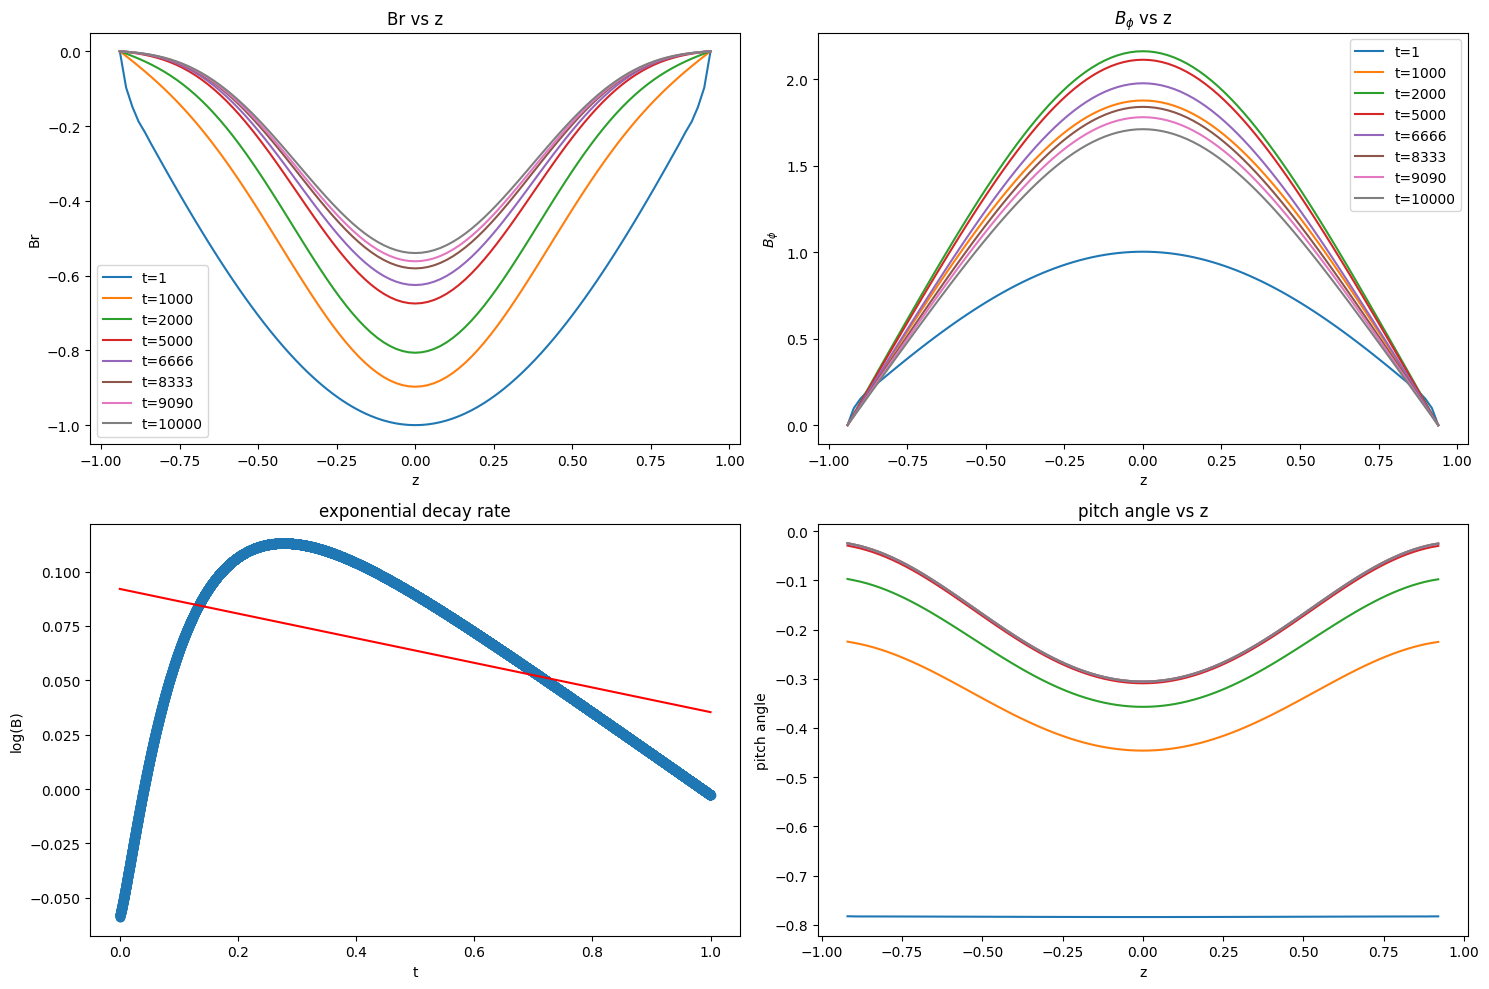

The Decay rate is -0.1304


In [67]:
def Bphi_t0(z):
    return np.cos((np.pi/2)*z/h)

def Br_t0(z):
    return np.cos((np.pi/2)*z/h+(np.pi))


def vzfn(tv):
    return np.sqrt(tv)/30




def alphafn(z):
    return (np.sin(np.pi*z/h))

def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,tv):
    return (d2f(Br_t0,dz,Nz)-df(alpha*alphafn(z)*Bphi_t0,dz,Nz))
def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,tv):
    return (d2f(Bphi_t0,dz,Nz)+((D/alpha)*Br_t0))


# z0 = 0.0  # start of spatial region in z
# zf = 10.0  # end of spatial domain in z
z0 = -0.768 # start of spatial region in z
zf = 0.768 # end of spatial domain in z

t0=0.0
tf = 1 

Nz = 101  # Number of spatial grid points
Nt = 10000  # Number of time steps

dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size
h=0.768


z = np.linspace(z0, zf, Nz)

t = np.linspace(t0, tf, Nt+1)

Br_t0=Br_t0(z)
Bphi_t0=Bphi_t0(z)

Bphi_z0=0
Bphi_zf=0
Br_z0=0
Br_zf=0

#print(Bphi_z0,Bphi_zf,Br_z0,Br_zf)
time_plot=[1,int(Nt/10),int(Nt/5),int(Nt/2),int(Nt/1.5),int(Nt/1.2),int(Nt/1.1),Nt]
#time_plot=[1,500]



D, alpha = -17.1, 1
plotfn(*solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D),time_plot,t,z,Nz)

  0%|          | 0/20001 [00:00<?, ?it/s]

 61%|██████▏   | 12258/20001 [00:30<00:18, 427.50it/s]/tmp/ipykernel_16487/907069592.py:97: RuntimeWarning: divide by zero encountered in log10
  decay.append(np.log10(np.sqrt((np.mean(Br_t0))**2+(np.mean(Bphi_t0))**2)))
100%|██████████| 20001/20001 [00:49<00:00, 402.13it/s]
/tmp/ipykernel_16487/907069592.py:104: RuntimeWarning: invalid value encountered in divide
  pitch=np.arctan(np.array(Br)/np.array(Bphi))


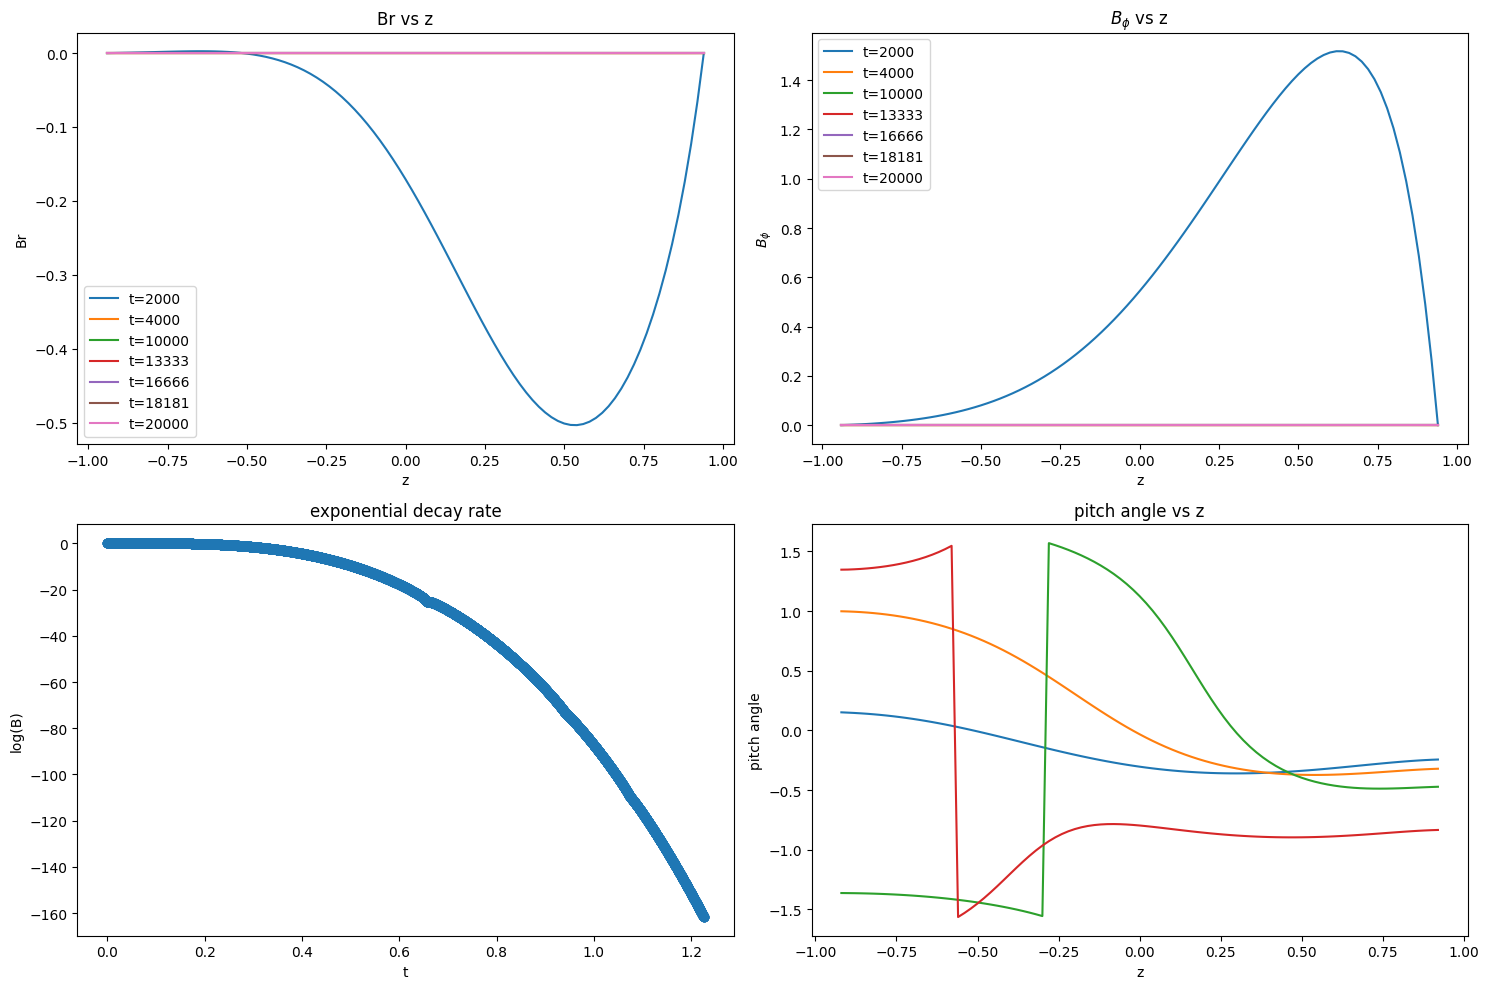

The Decay rate is nan


In [68]:
def Bphi_t0(z):
    return np.cos((np.pi/2)*z)

def Br_t0(z):
    return np.cos((np.pi/2)*z+(np.pi))


def vzfn(tv):
    return (50*tv)




def alphafn(z):
    return (np.sin(np.pi*z/h))
def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,tv):
    return (d2f(Br_t0,dz,Nz)-df(alpha*alphafn(z)*Bphi_t0,dz,Nz)-df(vzfn(tv)*Br_t0,dz,Nz))
def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz,vzfn,tv):
    return (d2f(Bphi_t0,dz,Nz)+((D/alpha)*Br_t0)-df(vzfn(tv)*Bphi_t0,dz,Nz))


# z0 = 0.0  # start of spatial region in z
# zf = 10.0  # end of spatial domain in z
z0 = -0.768 # start of spatial region in z
zf = 0.768 # end of spatial domain in z

t0=0.0
tf = 2 

Nz = 101  # Number of spatial grid points
Nt = 20000  # Number of time steps

dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size
h=0.768


z = np.linspace(z0, zf, Nz)

t = np.linspace(t0, tf, Nt+1)

Br_t0=Br_t0(z)
Bphi_t0=Bphi_t0(z)

Bphi_z0=0
Bphi_zf=0
Br_z0=0
Br_zf=0

#print(Bphi_z0,Bphi_zf,Br_z0,Br_zf)
time_plot=[int(Nt/10),int(Nt/5),int(Nt/2),int(Nt/1.5),int(Nt/1.2),int(Nt/1.1),Nt]
#time_plot=[1,500]



D, alpha = -17.1, 1
plotfn(*solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D),time_plot,t,z,Nz)

In [42]:
#Running all the function using different value of D.
alpha=1
# D=1
# d=2
precision=0.1

D_c(solve2,precision)


current |D| = 0


  9%|▉         | 892/10001 [00:02<00:26, 340.98it/s]


KeyboardInterrupt: 